In [274]:
# import base modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [4]:
from sklearn import datasets

In [61]:
boston = datasets.load_boston()

In [59]:
list(boston)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [62]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [22]:
type(boston.data)

numpy.ndarray

In [29]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
X = boston.data
y = boston.target

In [34]:
X_df = pd.DataFrame(X, columns = boston.feature_names)
y_df = pd.Series(y)
df = pd.concat([X_df, y_df], axis=1)

In [48]:
df = df.rename(columns = {0: 'MEDV'}).rename(str.lower, axis='columns')

In [49]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## create some troubles

In [85]:
df1 = df.copy()

In [86]:
df1.loc[df1.sample(5).index, 'tax'] = None

In [87]:
df1.isnull().mean()

crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
rm         0.000000
age        0.000000
dis        0.000000
rad        0.000000
tax        0.009881
ptratio    0.000000
b          0.000000
lstat      0.000000
medv       0.000000
dtype: float64

In [88]:
df1.chas = np.where(df1.chas==1, 'yes', 'no')

In [89]:
df1.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,407.510978,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.494007,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [90]:
df1.chas.value_counts()

no     471
yes     35
Name: chas, dtype: int64

## Identification of column type
- `CHAS` is categorical variables
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)



In [91]:
df1.chas.value_counts()

no     471
yes     35
Name: chas, dtype: int64

# Preprocessing outside of Sklearn

- convert to categorical
- get_dummies for categorical variable

In [92]:
df1.chas = df1.chas.astype('category')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null category
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        501 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: category(1), float64(13)
memory usage: 52.1 KB


In [96]:
df1 = pd.get_dummies(df1, drop_first=True)

In [97]:
df1.chas_yes.value_counts()

0    471
1     35
Name: chas_yes, dtype: int64

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim        506 non-null float64
zn          506 non-null float64
indus       506 non-null float64
nox         506 non-null float64
rm          506 non-null float64
age         506 non-null float64
dis         506 non-null float64
rad         506 non-null float64
tax         501 non-null float64
ptratio     506 non-null float64
b           506 non-null float64
lstat       506 non-null float64
medv        506 non-null float64
chas_yes    506 non-null uint8
dtypes: float64(13), uint8(1)
memory usage: 52.0 KB


In [100]:
df1.isnull().mean()

crim        0.000000
zn          0.000000
indus       0.000000
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.009881
ptratio     0.000000
b           0.000000
lstat       0.000000
medv        0.000000
chas_yes    0.000000
dtype: float64

# Split training and test data set

In [106]:
X_df1 = df1.drop('medv', axis=1)

In [107]:
X_df1.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'chas_yes'],
      dtype='object')

In [108]:
y_df1 = df1.medv

In [113]:
X1 = X_df1.values
y1 = y_df1.values
feature_names = X_df1.columns

In [111]:
X1.shape 

(506, 13)

In [112]:
y1.shape

(506,)

In [114]:
from sklearn.model_selection import train_test_split 

In [141]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=33)

# Manual Preprocess training data

In [142]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [170]:
imputer = Imputer(strategy = 'mean', axis=0)

In [144]:
sum(np.isnan(X1_train))

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0])

In [145]:
X2_train = imputer.fit_transform(X1_train)

In [146]:
sum(np.isnan(X2_train))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [147]:
imputer.statistics_

array([3.37260129e+00, 1.14566832e+01, 1.09074257e+01, 5.49308416e-01,
       6.29683911e+00, 6.80797030e+01, 3.80829752e+00, 9.07673267e+00,
       3.98139651e+02, 1.84316832e+01, 3.61763762e+02, 1.23915842e+01,
       7.42574257e-02])

In [148]:
scaler = StandardScaler()

In [149]:
X2_train = scaler.fit_transform(X2_train)

# Creating pipeline for preprocessing

In [150]:
from sklearn.pipeline import Pipeline

In [151]:
preprocess_pipe = Pipeline([
    ('impute', Imputer(strategy = 'mean', axis=0)),
    ('standardize', StandardScaler())
])

In [152]:
X3_train = preprocess_pipe.fit_transform(X1_train)

In [155]:
# checking if manual and pipeline produce the same output
sum(X2_train==X3_train)

array([404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404])

In [159]:
sum(np.isnan(y1_train))

0

# Modeling

## Linear Regression

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lin_reg = LinearRegression()

In [160]:
lin_reg.fit(X3_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
lin_reg_prediction = lin_reg.predict(X3_train)

In [163]:
from sklearn.metrics import mean_squared_error

In [165]:
lin_reg_mse = mean_squared_error(lin_reg_prediction, y1_train)

In [168]:
np.sqrt(lin_reg_mse)

4.712746510698226

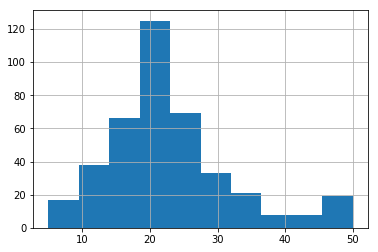

In [175]:
pd.Series(y1_train).hist()
plt.show()

In [181]:
regression_analysis = pd.DataFrame({'predicted': lin_reg_prediction, 
                                    'actual': y1_train,
                                    'residual': residual})

In [404]:
from scipy.stats import norm

In [422]:
def regression_analysis(predicted, actual):
    dd = pd.DataFrame({'predicted': predicted,
                       'actual': actual,
                       'residual': predicted-actual})
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    plt.subplots_adjust(wspace = 0.3, hspace=0.4)
    dd.plot('predicted', 'actual', kind='scatter', ax=axes[0])
    axes[0].plot(axes[0].get_xlim(), axes[0].get_xlim(), color='r', ls='--')
    dd.plot('predicted', 'residual', kind='scatter', ax=axes[1])
    axes[1].axhline(y=0, ls='--', color='r')
    dd.residual.hist(bins=30, ax=axes[2])

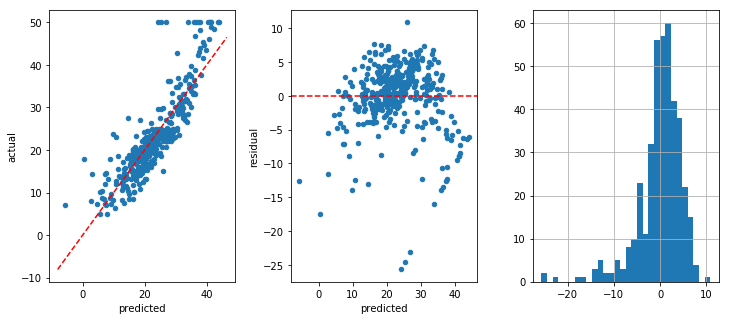

In [423]:
regression_analysis(lin_reg_prediction, y1_train)

In [213]:
from sklearn.model_selection import cross_validate

In [214]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'explained_variance', 'r2']

In [219]:
lin_reg_cv_results = cross_validate(lin_reg,
                                    X3_train,
                                    y1_train,
                                    scoring=scoring,
                                    cv=5,
                                    return_train_score=False)

In [220]:
lin_reg_cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_neg_mean_absolute_error', 'test_explained_variance', 'test_r2'])

In [244]:
import re

In [254]:
def cv_performance(scoring, cv_results):
    for score in scoring:
        if re.search('neg', score) != None:
            if re.search('squared', score) != None:
                print('cross validated test_root_'+re.sub('neg_', '', score)+': ', np.sqrt(np.mean(-cv_results['test_'+score])))
            else:
                print('cross validated test_'+re.sub('neg_', '', score)+': ', np.mean(-cv_results['test_'+score]))
        else :
            print('cross validated test_'+score+': ', np.mean(cv_results['test_'+score]))

In [267]:
def cv_performance(scoring, cv_results):
    results = {}
    for score in scoring:
        if re.search('neg', score) != None:
            if re.search('squared', score) != None:
                results['cross validated test_root_'+re.sub('neg_', '', score)]=np.sqrt(np.mean(-cv_results['test_'+score]))
            else:
                results['cross validated test_'+re.sub('neg_', '', score)]=np.mean(-cv_results['test_'+score])
        else :
            results['cross validated test_'+score]=np.mean(cv_results['test_'+score])
    return pd.Series(results)

In [268]:
cv_performance(scoring, lin_reg_cv_results)

cross validated test_explained_variance         0.705931
cross validated test_mean_absolute_error        3.456308
cross validated test_r2                         0.705321
cross validated test_root_mean_squared_error    5.042524
dtype: float64

## Elastic Net

In [235]:
from sklearn.linear_model import ElasticNet

In [236]:
en_reg = ElasticNet(alpha=0.5, l1_ratio=0.5)

In [237]:
en_reg.fit(X3_train, y1_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Stochastic Gradient Descent

In [270]:
from sklearn.linear_model import SGDRegressor

In [271]:
sgd_reg = SGDRegressor()

In [275]:
sgd_reg.fit(X3_train, y1_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

## KNN Regressor

In [278]:
from sklearn.neighbors import KNeighborsRegressor

In [279]:
knn_reg = KNeighborsRegressor()

In [280]:
knn_reg.fit(X3_train, y1_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

## Ensemble Method

## Bagging - Random Forest
- Bagging of Decision Trees

In [283]:
from sklearn.ensemble import BaggingRegressor

In [284]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
rf_reg = RandomForestRegressor(max_depth = 4, n_estimators=20)

In [290]:
rf_reg.fit(X3_train, y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Bagging - Extremely Randomized Trees
- Bagging of extremely randomized Decision Trees

In [293]:
from sklearn.ensemble import ExtraTreesRegressor

In [294]:
et_reg = ExtraTreesRegressor(max_depth = 4, n_estimators=20)

In [295]:
et_reg.fit(X3_train, y1_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [298]:
et_reg.feature_importances_

array([0.01036176, 0.00940902, 0.04843261, 0.03251093, 0.33061712,
       0.00370255, 0.02418101, 0.0051361 , 0.0315657 , 0.04819693,
       0.00664896, 0.43712724, 0.01211006])

## Boosting - AdaBoost
- Boosting of Decision Trees

In [302]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [307]:
ab_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1)

In [308]:
ab_reg.fit(X3_train, y1_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.1, loss='linear', n_estimators=100,
         random_state=None)

## Boosting - Gradient Tree Boosting
- generalization of boosting of decision trees to arbitrary differentiable loss function

In [311]:
from sklearn.ensemble import GradientBoostingRegressor

In [312]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

In [313]:
gb_reg.fit(X3_train, y1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## Neural Network - Multi Layer Perceptron

In [316]:
from sklearn.neural_network import MLPRegressor

In [317]:
nn_reg = MLPRegressor()

In [318]:
nn_reg.fit(X3_train, y1_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Combine all model results

In [331]:
def all_model_performance(estimators, scoring, X, y):
    all_performance = {}
    for model_name, model_object in estimators:
        model_object.fit(X, y)
        estimator_cv_results = cross_validate(model_object, X, y, 
                                              scoring=scoring, cv=5, return_train_score=False)
        all_performance[model_name] = cv_performance(scoring, estimator_cv_results)
    return pd.DataFrame(all_performance)

In [332]:
estimators = [('linear regression', LinearRegression()),
              ('Elastic Net', ElasticNet(alpha=0.5, l1_ratio=0.5)),
              ('SGD', SGDRegressor()), 
              ('KNN', KNeighborsRegressor()),
              ('Random Forrest', RandomForestRegressor(max_depth = 4, n_estimators=20)),
              ('Extra Trees', ExtraTreesRegressor(max_depth = 4, n_estimators=20)),
              ('AbaBoost', AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1)),
              ('Gradient Boost Tree', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)),
              ('Neural Network', MLPRegressor())]

In [333]:
estimators[0]

('linear regression',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

In [335]:
all_model_performance(estimators, scoring, X3_train, y1_train)

,AbaBoost,Elastic Net,Extra Trees,Gradient Boost Tree,KNN,Neural Network,Random Forrest,SGD,linear regression
cross validated test_explained_variance,0.885841,0.676311,0.814126,0.894031,0.710650,0.634197,0.851775,0.697836,0.705931
cross validated test_mean_absolute_error,2.389894,3.524945,2.791374,2.201033,2.991121,4.134540,2.682651,3.353546,3.456308
cross validated test_r2,0.884891,0.675097,0.813640,0.893774,0.702661,0.614230,0.851059,0.686839,0.705321
cross validated test_root_mean_squared_error,3.178029,5.313347,4.024523,3.075862,5.002703,5.727193,3.643886,5.210400,5.042524


# Grid Search - Gradient Boost Tree

In [336]:
from sklearn.model_selection import GridSearchCV

In [341]:
parameters = {'max_depth': [3,4], 
              'learning_rate': [0.1, 0.2, 0.3], 
              'n_estimators': [100, 150, 200]}
gb_reg = GradientBoostingRegressor()
gs_cv = GridSearchCV(gb_reg, parameters, cv=5, scoring='neg_mean_squared_error')
gs_cv.fit(X3_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4], 'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [343]:
gs_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [349]:
gs_cv_results = gs_cv.cv_results_

In [351]:
for mean_test_score, params in zip(gs_cv_resutls['mean_test_score'], gs_cv_results['params']):
    print(params, np.sqrt(-mean_test_score))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} 3.0877943280228592
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150} 3.0999818638694436
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} 3.084760587777445
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100} 3.1537490133131
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150} 3.110134016457098
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200} 3.0872152308495795
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100} 3.072476820963724
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150} 3.097969995644268
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200} 3.095552381838533
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100} 2.9951742845874354
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150} 3.1162467871891133
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200} 3.14211185524674
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100} 3.

In [352]:
from sklearn.model_selection import RandomizedSearchCV

In [354]:
from scipy.stats import randint
from scipy.stats import uniform

In [357]:
param_dist = {'max_depth': randint(low=2, high=4), 
              'learning_rate': uniform(), 
              'n_estimators': randint(low=100, high=300)}

In [358]:
rs_cv = RandomizedSearchCV(gb_reg, param_dist,
                           n_iter=10, cv=5, 
                           scoring='neg_mean_squared_error')

In [359]:
rs_cv.fit(X3_train, y1_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1a18ff60>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1a18fcc0>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1aac38d0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_err

In [360]:
rs_cv.best_params_

{'learning_rate': 0.10369522565400269, 'max_depth': 3, 'n_estimators': 284}

In [361]:
rs_cv_results = rs_cv.cv_results_

In [362]:
for mean_test_score, params in zip(rs_cv_results['mean_test_score'], rs_cv_results['params']):
    print(params, np.sqrt(-mean_test_score))

{'learning_rate': 0.5988833033417595, 'max_depth': 2, 'n_estimators': 135} 3.781566362225701
{'learning_rate': 0.788743871803604, 'max_depth': 2, 'n_estimators': 145} 4.181144354594329
{'learning_rate': 0.10369522565400269, 'max_depth': 3, 'n_estimators': 284} 2.9965654088884945
{'learning_rate': 0.9143997774097588, 'max_depth': 3, 'n_estimators': 158} 4.641672300510349
{'learning_rate': 0.31556300582982244, 'max_depth': 3, 'n_estimators': 143} 3.131164529189275
{'learning_rate': 0.6470359349439333, 'max_depth': 3, 'n_estimators': 144} 3.6623174139600483
{'learning_rate': 0.3947204021691022, 'max_depth': 2, 'n_estimators': 188} 3.890904437624331
{'learning_rate': 0.9539506404003466, 'max_depth': 3, 'n_estimators': 155} 4.761641717358544
{'learning_rate': 0.7831871537168336, 'max_depth': 3, 'n_estimators': 135} 4.044440793785487
{'learning_rate': 0.789570717949696, 'max_depth': 3, 'n_estimators': 207} 4.307610702936199


# Performance on Test Set

In [366]:
rs_cv.best_params_

{'learning_rate': 0.10369522565400269, 'max_depth': 3, 'n_estimators': 284}

In [367]:
best_model = GradientBoostingRegressor(max_depth=3, n_estimators=284, learning_rate=0.1)

In [368]:
best_model.fit(X3_train, y1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=284, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [370]:
X3_test = preprocess_pipe.transform(X1_test)

In [372]:
X3_test.shape

(102, 13)

In [373]:
y1_test.shape

(102,)

In [374]:
best_prediction = best_model.predict(X3_test)

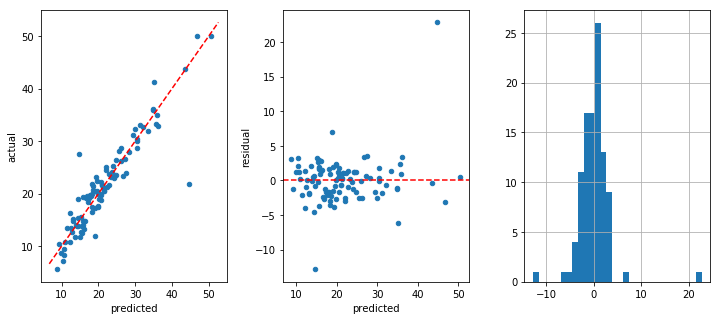

In [424]:
regression_analysis(best_prediction, y1_test)